# Global Demographic Trends: Where the World is Going

**Objective**: Analyze UN demographic indicators (1950-2023) to understand global population dynamics and development patterns. We'll examine: (1) global aging and longevity trends, (2) regional demographic divergence, and (3) the relationship between population aging and life expectancy as indicators of socioeconomic development.

In [1]:
# import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_excel('../data/UN_demographic_indicators.xlsx', sheet_name='Estimates', skiprows=16)

In [2]:
# convert columns to numeric after 'Year'
numeric_columns = data.columns[11:]
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# remove unecessary columns, index
data = data.drop(columns=['Index'])

# rename some common columns
data = data.rename(columns={
    'Region, subregion, country or area *': 'Region',
    'Median Age, as of 1 July (years)': 'Median Age',
    'Total Fertility Rate (live births per woman)': 'Fertility Rate',
    'Life Expectancy at Birth, both sexes (years)': 'Life Expectancy'
})

## UN Demographic Data Processing

**Technical Approach**: UN Population Division data requires careful column handling and renaming for analysis clarity. Converting numeric columns ensures proper statistical operations while removing index columns streamlines the dataset. The demographic indicators span 73 years (1950-2023), providing comprehensive historical perspective on global population changes.

In [3]:
# view data
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 64 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Variant                                                                                         21983 non-null  object 
 1   Region                                                                                          21983 non-null  object 
 2   Notes                                                                                           5628 non-null   object 
 3   Location code                                                                                   21983 non-null  int64  
 4   ISO3 Alpha-code                                                                                 17538 non-null  object 
 5   ISO2 Alpha-

,Variant,Region,Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,Year,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,1950.0,...,580.500,497.388,238.516,268.734,207.620,375.391,426.221,322.650,0.0,0.0
1,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,1951.0,...,566.566,488.435,229.703,256.236,202.734,365.226,412.760,316.395,0.0,0.0
2,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,1952.0,...,546.444,475.370,217.311,238.560,195.926,350.613,393.364,307.314,0.0,0.0
3,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,1953.0,...,535.811,467.361,211.257,230.961,191.482,342.734,383.875,301.270,0.0,0.0
4,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,1954.0,...,522.058,455.621,203.337,221.377,185.296,332.327,371.737,292.807,0.0,0.0


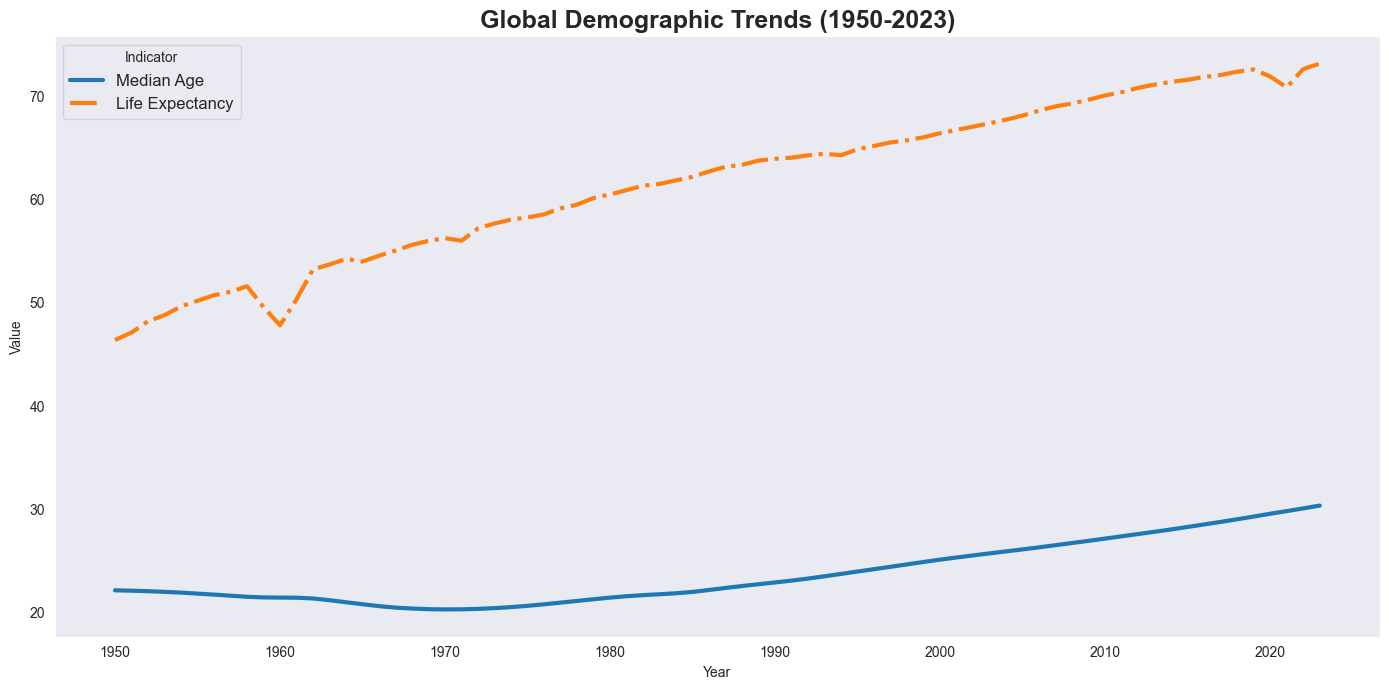

In [4]:
# refresh the data 
df = data.copy()

# use only world data
world_df = df[df['Region'] == 'World']

# build the plot
sns.set_style("dark")
plt.figure(figsize=(14, 7))
sns.lineplot(data=world_df, x='Year', y='Median Age', label='Median Age', linewidth=3, linestyle='-')
sns.lineplot(data=world_df, x='Year', y='Life Expectancy', label='Life Expectancy', linewidth=3, linestyle='-.')

# Add titles and labels
plt.title('Global Demographic Trends (1950-2023)', fontsize=18, weight='bold')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Indicator', fontsize=12)
plt.tight_layout()
plt.show()


## Global Demographic Transformation

**Key Insight**: World data reveals two fundamental trends - population aging (rising median age) and increasing longevity (life expectancy). These parallel trends represent the demographic transition as societies move from high birth/death rates to low birth/death rates, fundamentally reshaping global age structures and dependency ratios.

In [5]:
df['Region'].unique()

array(['World', 'Sustainable Development Goal (SDG) regions',
       'Sub-Saharan Africa', 'Northern Africa and Western Asia',
       'Central and Southern Asia', 'Eastern and South-Eastern Asia',
       'Latin America and the Caribbean',
       'Oceania (excluding Australia and New Zealand)',
       'Australia/New Zealand', 'Europe and Northern America',
       'Europe, Northern America, Australia, and New Zealand',
       'UN development groups', 'More developed regions',
       'Less developed regions', 'Least developed countries',
       'Less developed regions, excluding least developed countries',
       'Less developed regions, excluding China',
       'Land-locked Developing Countries (LLDC)', 'LLDC: Africa',
       'LLDC: Asia', 'LLDC: Europe', 'LLDC: Latin America',
       'Small Island Developing States (SIDS)', 'SIDS Caribbean',
       'SIDS Pacific',
       'SIDS Atlantic, Indian Ocean and South China Sea (AIS)',
       'World Bank income groups',
       'High-and-upper-mi

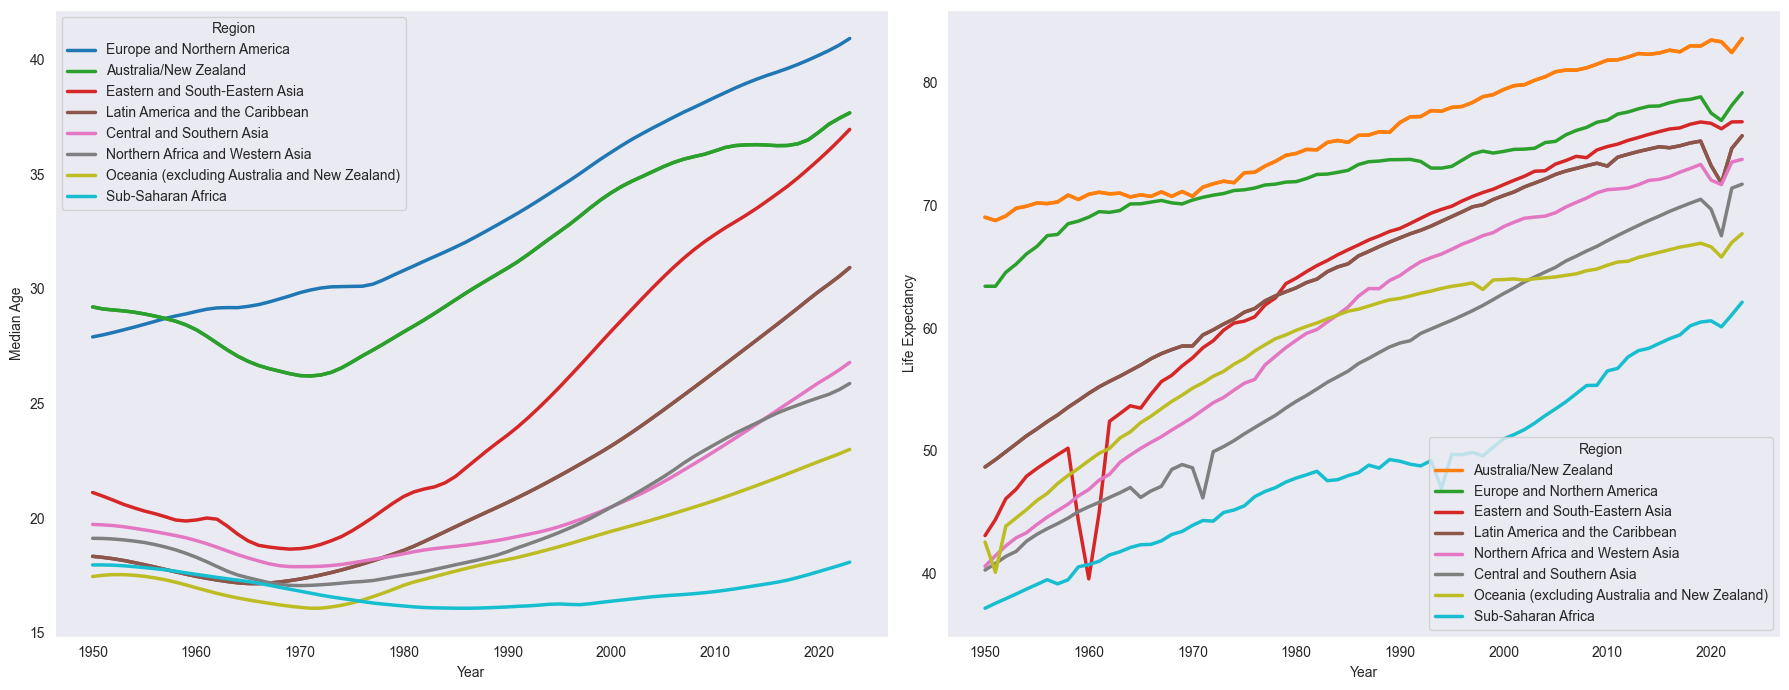

In [6]:
# select world by region
selected_regions = [
    'Sub-Saharan Africa',
    'Central and Southern Asia',
    'Eastern and South-Eastern Asia',
    'Northern Africa and Western Asia',
    'Oceania (excluding Australia and New Zealand)',
    'Australia/New Zealand',
    'Europe and Northern America',
    'Latin America and the Caribbean',
]

# group into a df
region_df = df[df['Region'].isin(selected_regions)].copy()

# Get the latest year in your dataset
latest_year = region_df['Year'].max()

# Group by region and get final values
final_values = (
    region_df[region_df['Year'] == latest_year]
    .set_index('Region')[['Median Age', 'Life Expectancy']]
)

# Sort regions by descending value
ordered_regions_median = final_values['Median Age'].sort_values(ascending=False).index.tolist()
ordered_regions_lifeexp = final_values['Life Expectancy'].sort_values(ascending=False).index.tolist()

# build the plot
# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharex=True)

# Median Age plot (ordered hue)
sns.lineplot(
    ax=axes[0], data=region_df, x='Year', y='Median Age',
    hue='Region', hue_order=ordered_regions_median,
    linewidth=2.5
)

# Life Expectancy plot (ordered hue)
sns.lineplot(
    ax=axes[1], data=region_df, x='Year', y='Life Expectancy',
    hue='Region', hue_order=ordered_regions_lifeexp,
    linewidth=2.5
)

# Final layout
plt.tight_layout()
plt.show()

## Regional Demographic Divergence

**Comparative Analysis**: Regional selection captures major world areas at different demographic transition stages. Dual visualization with ordered hue reveals demographic hierarchies - developed regions (Europe/North America, Australia/New Zealand) show advanced aging and longevity, while developing regions exhibit younger populations with rapidly improving life expectancy.

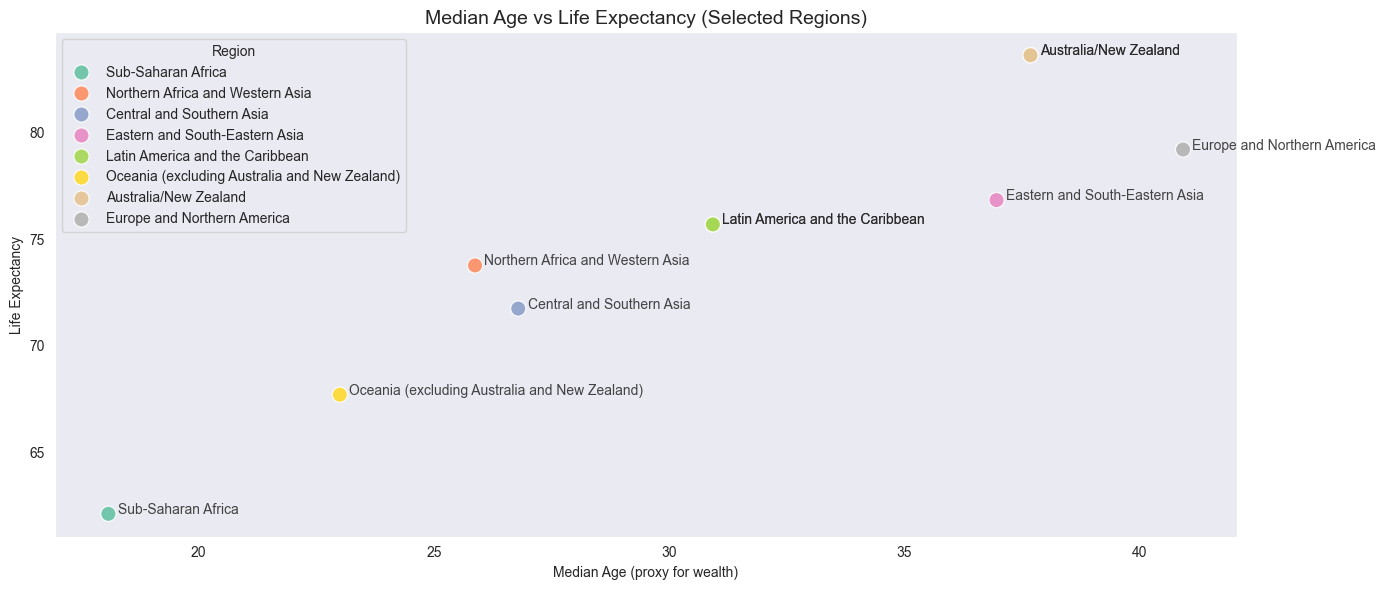

In [7]:
# Extract final year values for each region
scatter_df = region_df[region_df['Year'] == latest_year].copy()

# Scatter plot
plt.figure(figsize=(14, 6))
sns.scatterplot(
    data=scatter_df,
    x='Median Age',
    y='Life Expectancy',
    hue='Region',
    palette='Set2',
    s=120,
    alpha=0.9
)

# Add text labels for each region
for _, row in scatter_df.iterrows():
    plt.text(
        row['Median Age'] + 0.2,  # slight offset to right
        row['Life Expectancy'],
        row['Region'],
        fontsize=10,
        alpha=0.85
    )

plt.title('Median Age vs Life Expectancy (Selected Regions)', fontsize=14)
plt.xlabel('Median Age (proxy for wealth)')
plt.ylabel('Life Expectancy')
plt.tight_layout()
plt.show()


## Demographic Future: Implications & Conclusions

**Key Findings**: Analysis reveals global convergence toward aging populations with extended lifespans, but at different rates across regions. Europe/North America leads demographic transition while Sub-Saharan Africa maintains younger populations. This divergence creates global challenges including migration pressures, economic imbalances, and differential healthcare demands.

**Future Implications**: Demographic trajectories suggest continued global aging with profound implications for labor markets, social security systems, and healthcare infrastructure. Understanding these patterns is crucial for policy planning and international cooperation in an increasingly demographically divided world.

## Development Correlation Analysis

**Methodological Insight**: Scatter plot using latest year data reveals the median age-life expectancy relationship as a proxy for development levels. Higher median age typically correlates with higher life expectancy, reflecting healthcare access, economic development, and social infrastructure quality across different world regions.